# Analysis of Powerlifting Data using python

Using Powerlifting data from OpenPowerLifting.org, we will analyise the data get some useful information from it.
In order to easily follow this report it is important to be familiar with the following terminology:

Weight: a competitor's body weight in kg
Lift: Deadlift, benchpress, and squat are the three "lifts" in powerlifting. A lift is the competitor's highest completed "attempt" for each lift
Total: the total kg of a competitor's three lifts in a given competition

Questions This Report Answers

1.What is the distribution of Powerlifters by Gender in the Database?
2.Does age have an impact on lifting capacity?
3.How big of a difference does gender make?
4.How much influence does overall weight have on lifting capacity?


Content
Importing Libraries
Data Cleaning
Dropping Uncessary Columns
Exploring Missing Values
Filling Missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
path = "./openpowerlifting.csv"
data = pd.read_csv(path)
data = data[1:147149:]
data.shape

(147148, 17)

In [4]:
data.head(5)


,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40


In [5]:
data_new = data[['Name','Sex']]
data_new = data_new.drop_duplicates()

# Data Cleaning
Dropping Unecessary Columns

In [6]:
data.columns
data = data.drop(labels = ['Squat4Kg','Bench4Kg','Deadlift4Kg','Wilks'], axis = 1)

In [7]:
data.shape


(147148, 13)

In [8]:
data.tail(5)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place
147144,5128,John Pini,M,Raw,NaN,Amateur Junior 20-23,89.18,90,NaN,142.88,226.80,369.68,1
147145,5128,Robert Feudo,M,Raw,NaN,Amateur Master 40-44,88.27,90,NaN,NaN,242.67,242.67,1
147146,5128,Daniel Berlin,M,Wraps,NaN,Pro Open,87.72,90,240.40,163.29,276.69,680.39,1
147147,5128,Jamie Leupold,M,Raw,NaN,Amateur Master 40-44,98.88,100,165.56,113.40,199.58,478.54,1
147148,5128,Chris Dubuque,M,Raw,NaN,Amateur Submaster,99.79,100,124.74,86.18,183.70,394.63,3


In [9]:
print(data.isnull().sum())

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               107836
Division           13640
BodyweightKg         376
WeightClassKg        382
BestSquatKg        40389
BestBenchKg         7672
BestDeadliftKg     33171
TotalKg             6230
Place                555
dtype: int64


# Filling the missing values using ffill


In [10]:
data.fillna(method ='ffill',inplace = True)
data.isnull().sum()

MeetID            0
Name              0
Sex               0
Equipment         0
Age               0
Division          0
BodyweightKg      0
WeightClassKg     0
BestSquatKg       0
BestBenchKg       0
BestDeadliftKg    0
TotalKg           0
Place             0
dtype: int64

In [11]:
data.tail(5)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place
147144,5128,John Pini,M,Raw,52.0,Amateur Junior 20-23,89.18,90,208.65,142.88,226.80,369.68,1
147145,5128,Robert Feudo,M,Raw,52.0,Amateur Master 40-44,88.27,90,208.65,142.88,242.67,242.67,1
147146,5128,Daniel Berlin,M,Wraps,52.0,Pro Open,87.72,90,240.40,163.29,276.69,680.39,1
147147,5128,Jamie Leupold,M,Raw,52.0,Amateur Master 40-44,98.88,100,165.56,113.40,199.58,478.54,1
147148,5128,Chris Dubuque,M,Raw,52.0,Amateur Submaster,99.79,100,124.74,86.18,183.70,394.63,3


# Q1 - Distribution of Powerlifters by Gender in the Sample

[None, None, None, None]

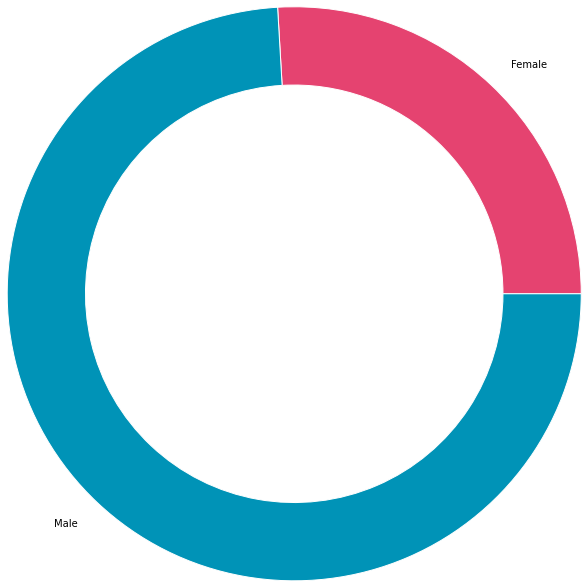

In [12]:
gender_size = data_new.Sex.value_counts().sort_index().tolist()
gender_names = ['Female','Male']
col = ['#c973d0','#4a73ab']
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(gender_size, radius=3.3, labels=gender_names, colors = ['#e54370','#0093b7']) 
plt.setp( mypie, width=0.9, edgecolor='white')

# Intuition :
Based on the distinct athletes by gender, the sample chosen had ~70% males and ~30% females.

NOTE : The original dataset had majority of the values missing for rows, so forward/backward fill wouldn't be intuitive to apply in that scenario. Considering this those rows were dropped

# Q2 - Does age have an impact on lifting capacity
Catgorizing by Age

In [13]:
def squat_calculate(x):
    if(x < 10.0):
        return "05-10"
    if(x >= 10.0 and x < 20.0):
        return "10-20"
    if(x >= 20.0 and x < 30.0):
        return "20-30"
    if(x >= 30.0 and x < 40.0):
        return "30-40"
    if(x >= 40.0 and x < 50.0):
        return "40-50"
    if(x >= 50.0 and x < 60.0):
        return "50-60"
    if(x >= 60.0 and x < 70.0):
        return "60-70"
    if(x >= 70.0 and x < 80.0):
        return "70-80"
    if(x >= 80.0 and x < 90.0):
        return "80-90"
    else:
        return "90-100"
    


data['Agecategory'] = pd.DataFrame(data.Age.apply(lambda x : squat_calculate(x)))

In [14]:
data.head(25)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Agecategory
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,40-50
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,40-50
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,142.88,95.25,163.29,95.25,1,40-50
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,142.88,31.75,90.72,122.47,1,10-20
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,170.10,77.11,145.15,392.36,1,20-30
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,124.74,95.25,163.29,383.28,1,60-70
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,124.74,95.25,163.29,383.28,1,60-70
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,120.20,54.43,108.86,283.49,1,50-60
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,120.20,54.43,108.86,108.86,1,50-60
10,0,Kayce Hoover,F,Wraps,24.0,Junior,65.50,67.5,138.35,65.77,136.08,340.20,1,20-30


# Calculating Average Best [Squat, Bench,Deadligt] by Age Category for Male/Female Athletes

In [15]:
data_male = pd.DataFrame(data[data['Sex'] == 'M'])
data_female = pd.DataFrame(data[data['Sex'] == 'F'])
lifting_capacity_m = pd.DataFrame(data_male.groupby('Agecategory')[['BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()
lifting_capacity_f = pd.DataFrame(data_female.groupby('Agecategory')[['BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()

# Resetting the Indexes

<AxesSubplot:xlabel='Agecategory'>

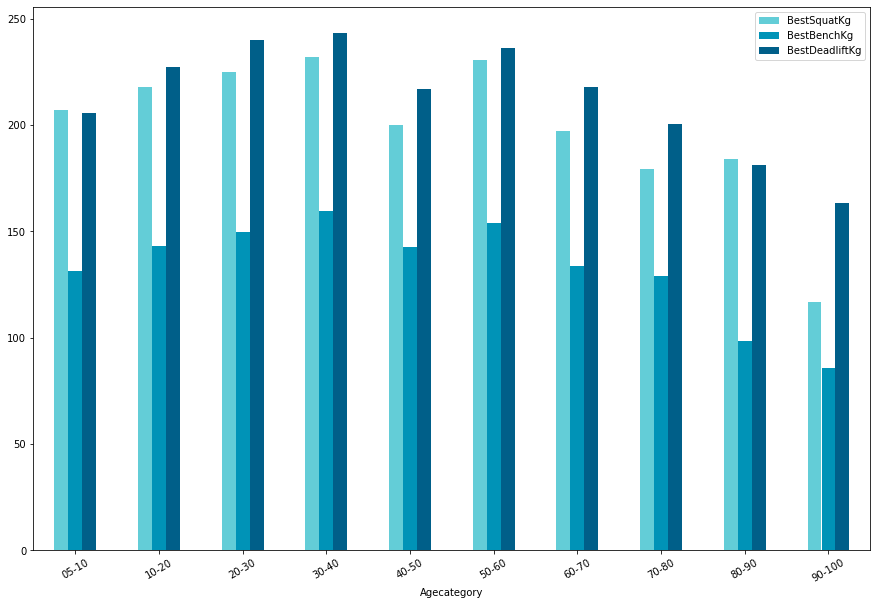

In [16]:
#plt.figure(figsize = (20,10))
lifting_capacity_m.plot(kind = 'bar', color = ['#63cdd7','#0093b7','#005f89'], figsize = (15,10), x = 'Agecategory', rot = 30)

# Intuition :
For Male Atheletes age group 30-40 lifted the maximum in either of the categories, followed by age groups 20-30 and 40-50.

<AxesSubplot:xlabel='Agecategory'>

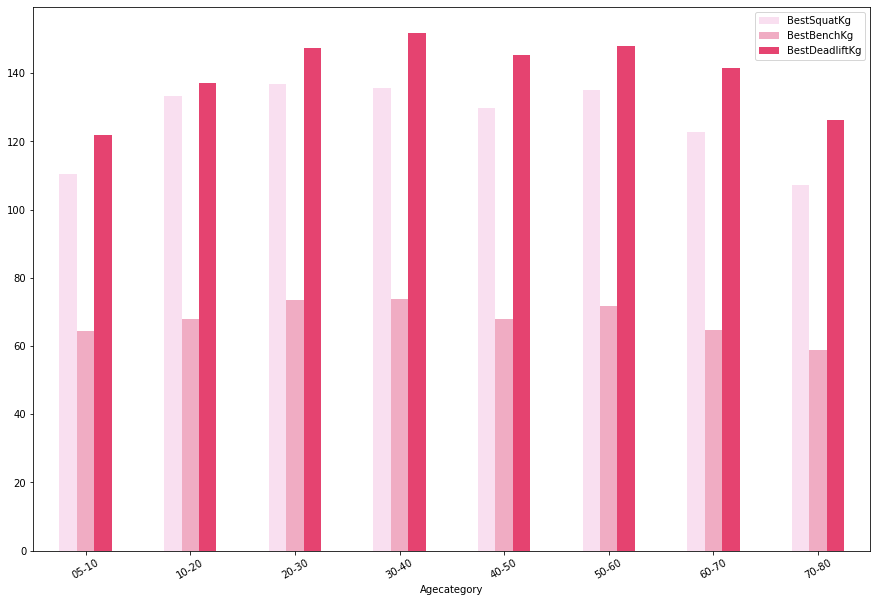

In [17]:
lifting_capacity_f.plot(kind = 'bar', color = ['#f9dff0','#f0acc3','#e54370'], figsize = (15,10), x = 'Agecategory', rot = 30)

# Q3 - How big of a difference does gender make?

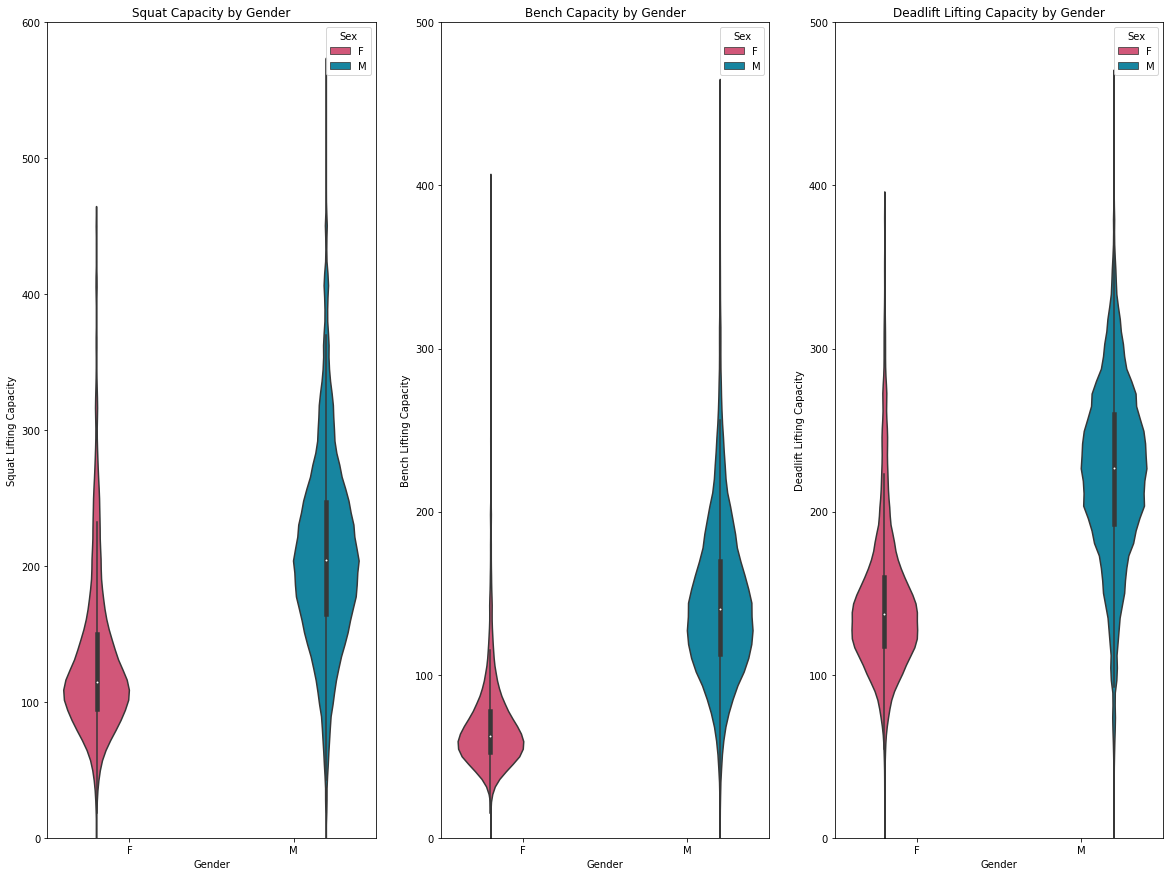

In [18]:
import seaborn as sns
plt.figure(figsize = (20,15))

plt.subplot(1,3,1)

plt.ylim(0,600)
sns.violinplot(data = data, x = 'Sex', y = 'BestSquatKg',hue = 'Sex', scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
plt.style.use("fast")
plt.title('Squat Capacity by Gender')
plt.xlabel('Gender')
plt.ylabel('Squat Lifting Capacity')


plt.subplot(1,3,2)
plt.ylim(0,500)
plt.style.use("fast")
sns.violinplot(data = data, x = 'Sex', y = 'BestBenchKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
plt.xlabel('Gender')
plt.ylabel('Bench Lifting Capacity')
plt.title('Bench Capacity by Gender')


plt.subplot(1,3,3)
plt.ylim(0,500)
plt.style.use("fast")
sns.violinplot(data = data, x = 'Sex', y = 'BestDeadliftKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#e54370','#0093b7'])
plt.xlabel('Gender')
plt.ylabel('Deadlift Lifting Capacity')
plt.title('Deadlift Lifting Capacity by Gender')


plt.show()

# Q4 How much influence does overall weight have on lifting capacity?

In [19]:
data_male = pd.DataFrame(data[data['Sex'] == 'M'])
data_female = pd.DataFrame(data[data['Sex'] == 'F'])
bodyw_lcm = pd.DataFrame(data_male.groupby('Agecategory')[['BodyweightKg','BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()
bodyw_lcf = pd.DataFrame(data_female.groupby('Agecategory')[['BodyweightKg','BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()

In [20]:
bodyw_lcm 

,Agecategory,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg
0,05-10,83.255970,207.149925,131.199701,205.811567
1,10-20,92.791170,217.780733,143.088283,227.290051
2,20-30,92.287170,224.802024,149.487598,240.008695
3,30-40,96.957500,232.095013,159.517297,243.404492
4,40-50,92.273930,199.810566,142.442064,216.923240
5,50-60,94.974006,230.522752,153.924803,236.009716
6,60-70,91.423858,197.221402,133.523622,218.060287
7,70-80,92.220779,179.210783,129.145860,200.464337
8,80-90,75.374255,184.021702,98.424894,181.263191
9,90-100,90.216667,116.666667,85.833333,163.333333


In [21]:
bodyw_lcf

,Agecategory,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg
0,05-10,63.123462,110.416538,64.535000,121.793462
1,10-20,67.359341,133.293476,68.012164,137.166256
2,20-30,68.675556,136.926517,73.536829,147.349444
3,30-40,70.060837,135.705552,73.890590,151.853748
4,40-50,69.404527,129.681482,67.893488,145.417584
5,50-60,68.264838,135.081934,71.806477,148.077047
6,60-70,68.686200,122.707223,64.753954,141.559411
7,70-80,71.635677,107.334552,58.868439,126.252569


# Total Lifting Capacity

In [22]:
bodyw_lcm['Total'] = bodyw_lcm['BestSquatKg'] + bodyw_lcm['BestBenchKg']+bodyw_lcm['BestDeadliftKg']
bodyw_lcf['Total'] = bodyw_lcf['BestSquatKg'] + bodyw_lcf['BestBenchKg']+bodyw_lcf['BestDeadliftKg']

In [23]:
bodyw_lcm['wRatio'] = bodyw_lcm['Total']/bodyw_lcm['BodyweightKg']
bodyw_lcf['wRatio'] = bodyw_lcf['Total']/bodyw_lcf['BodyweightKg']

In [24]:
bodyw_lcm

,Agecategory,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Total,wRatio
0,05-10,83.255970,207.149925,131.199701,205.811567,544.161194,6.536002
1,10-20,92.791170,217.780733,143.088283,227.290051,588.159067,6.338524
2,20-30,92.287170,224.802024,149.487598,240.008695,614.298317,6.656378
3,30-40,96.957500,232.095013,159.517297,243.404492,635.016801,6.549435
4,40-50,92.273930,199.810566,142.442064,216.923240,559.175870,6.059955
5,50-60,94.974006,230.522752,153.924803,236.009716,620.457272,6.532917
6,60-70,91.423858,197.221402,133.523622,218.060287,548.805312,6.002868
7,70-80,92.220779,179.210783,129.145860,200.464337,508.820979,5.517422
8,80-90,75.374255,184.021702,98.424894,181.263191,463.709787,6.152098
9,90-100,90.216667,116.666667,85.833333,163.333333,365.833333,4.055053


In [25]:
bodyw_lcf

,Agecategory,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Total,wRatio
0,05-10,63.123462,110.416538,64.535000,121.793462,296.745000,4.701025
1,10-20,67.359341,133.293476,68.012164,137.166256,338.471896,5.024869
2,20-30,68.675556,136.926517,73.536829,147.349444,357.812790,5.210191
3,30-40,70.060837,135.705552,73.890590,151.853748,361.449889,5.159086
4,40-50,69.404527,129.681482,67.893488,145.417584,342.992554,4.941933
5,50-60,68.264838,135.081934,71.806477,148.077047,354.965458,5.199829
6,60-70,68.686200,122.707223,64.753954,141.559411,329.020589,4.790199
7,70-80,71.635677,107.334552,58.868439,126.252569,292.455560,4.082541


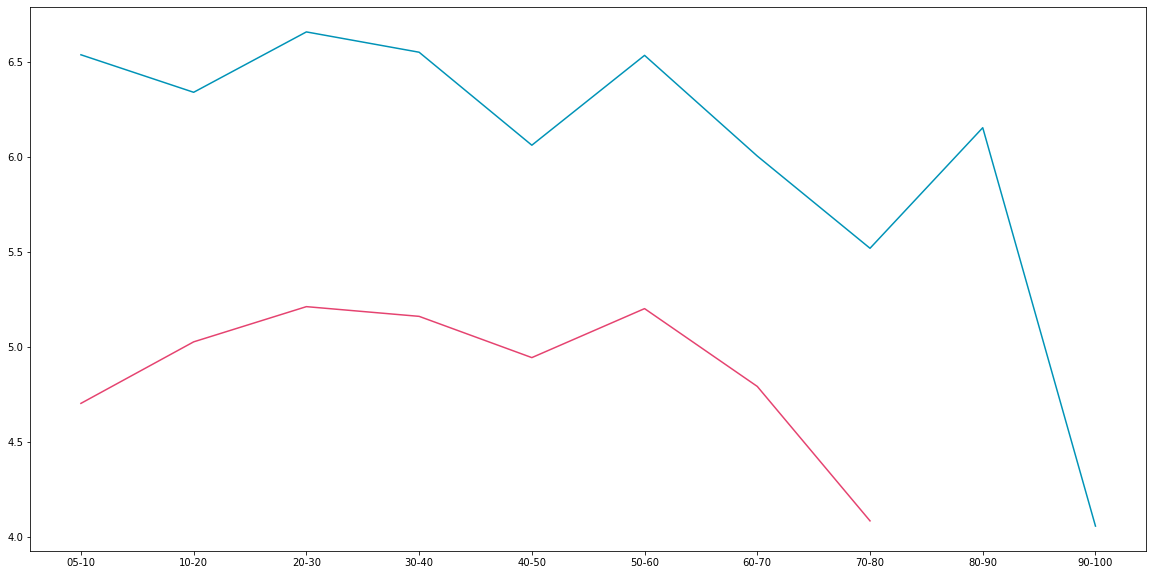

In [26]:
plt.figure(figsize = (20,10))
plt.plot(bodyw_lcm.Agecategory,bodyw_lcm.wRatio, color = '#0093b7')
plt.plot(bodyw_lcf.Agecategory,bodyw_lcf.wRatio, color = '#e54370')
#plt.plot(bodyw_lcf.Agecategory, y = bodyW_lcf.wRatio, kind = 'line')

# Intuition
The idea is to follow the same analogy as ants. Each ant has the ability to lift significantly higher weight in comparison to its own weight. For the male and female atheletes of all age groups, their lifting capacity as a rtio of their own weight was computed.

Results showed that for age group 20-30, the ratio of Total Weight lifting capacity to avg weight of atheletes was highest in this category, implying that atletes belonging to this age group could lift the highest weight in comparison to their own weight.